In [26]:
import numpy as np #mathemetical calculations
import pandas as pd #dataframe manipulations
import seaborn as sns  #data visualizations
import matplotlib.pyplot as plt  #data visualizations
import sklearn #for machine learning 
#import imblearn #for machine learning

#setting up the figure size and background for visualizations
plt.rcParams['figure.figsize'] = (16, 5)     #16 units for X axis and 5 units for Y axis

#setting up the style of the plol
plt.style.use('fivethirtyeight')
#plt.style.available   this will show the list of styles available to choose from

In [2]:
import imblearn

In [3]:
#reading the datasets

train = pd.read_csv('train (1).csv')  #training dataset is used to train the ML models
test = pd.read_csv('test (1).csv')    #after learning the patterns from the Testing datasets, we will predict the TARGET

In [4]:
#lets check the shape of the train and test datasets

print("Shape of TRAINING data: ", train.shape)
print("Shape of TESTING data: ", test.shape)  # 1 column is missing in the testing data which we will predict 

Shape of TRAINING data:  (54808, 14)
Shape of TESTING data:  (23490, 13)


In [5]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
test.columns   # we will predict 'is_promoted' column

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [7]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
#employee_id, recruitment_channel these are not required for our predictions

In [10]:
#checking descriptive statistics for categorical column, categorical column means columns with string data type or object data type
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [11]:
#checking descriptive statistics for numerical columns
train.describe().style.background_gradient(cmap = 'copper')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


C:\Users\TANMAYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


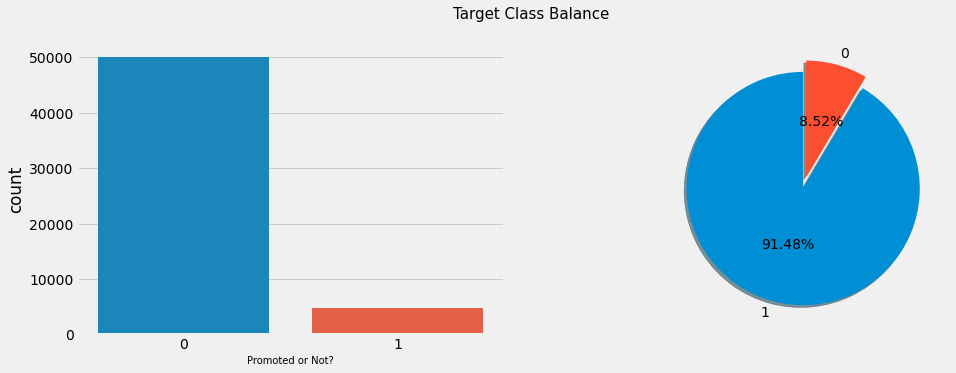

In [12]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

TREATMENT OF MISSING VALUES





In [13]:
# missing values in training data set

# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# lets check the head
train_missing_data.style.bar(color = ['gold'])

#there are total 2409 and 1034 missing values in train and test dataset respectively for education column
#there are total 4124 and 1812 missing values in he train and test dataset respectively for previous_year_rating column

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


IMPUTING OR ELIMINATING MISSING VALUES USING MODE VALUES OF THE RESPECTIVE COLUMNS




In [14]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [15]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Testing Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Testing Data : 0


TREATMENT OF OUTLIERS



In [16]:
# Lets first analyze the Numberical Columns
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


after carefully observing the above table, we come to conclusion that avg_training_score and length_of_service, both these columns may have Outliers. We will confirm that using BoxPlot.

C:\Users\TANMAYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TANMAYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


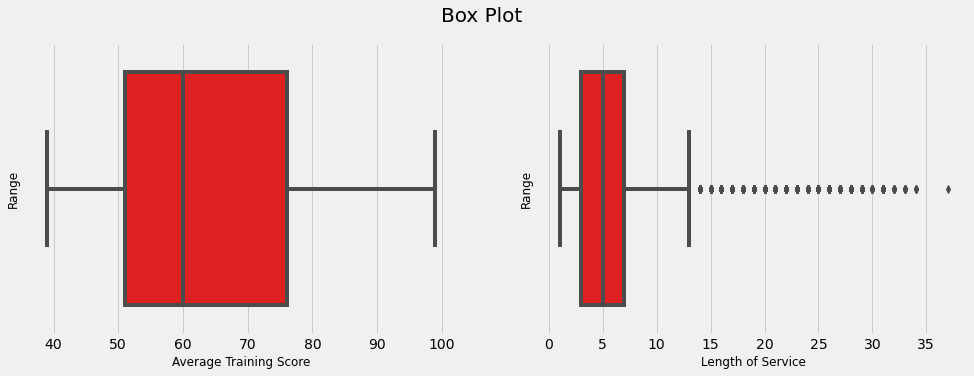

In [17]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

Here, the Box plot, helps us to analyze the middle 50 percentile of the data, and we can clearly check the minimum, maximum, median, and outlier values.

we observe that outliers are only present in length_of_service as there are some dotted points on the line.

In the Length of service attribute, we can see some points after the Max Value, which can be termed to be as Outliers. 

In [16]:
# lets remove the outliers from the length of service column

train = train[train['length_of_service'] > 13]

UNIVARIATE ANALYSIS




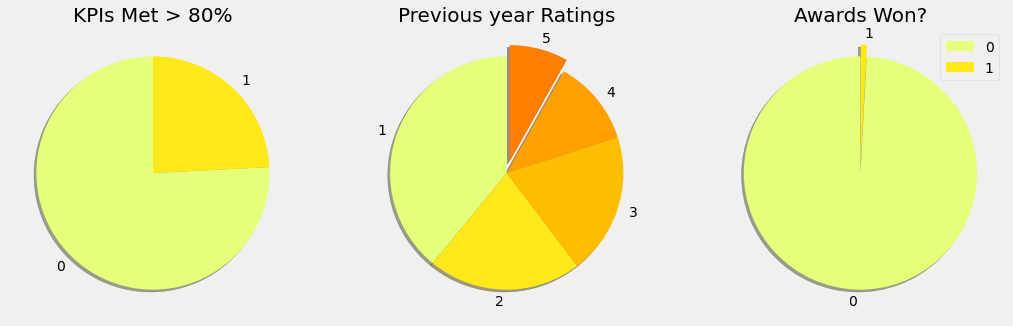

In [19]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of KPIs Met > 80% of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent number of Employees won Awards 
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

in Awards Won? pie chart, 1 means Yes won awards and 0 means No didn't win ant awards
in KPIs Met > 80% pie chart, 1 means Yes and 0 means No
in Previous Year Ratings pie chart, 1 means rating is around 1.0, 2 means rating is around 2.0 and so on.

we observe from the 1st pie chart that only few employees around 23% employees have KPIs Met > 80%
in 2nd pie chart, most employees have 1.0 rating and very few have good rating of 5.0
in 3rd pie chart, very less (2% employees) only have won any Awards for their work

C:\Users\TANMAYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


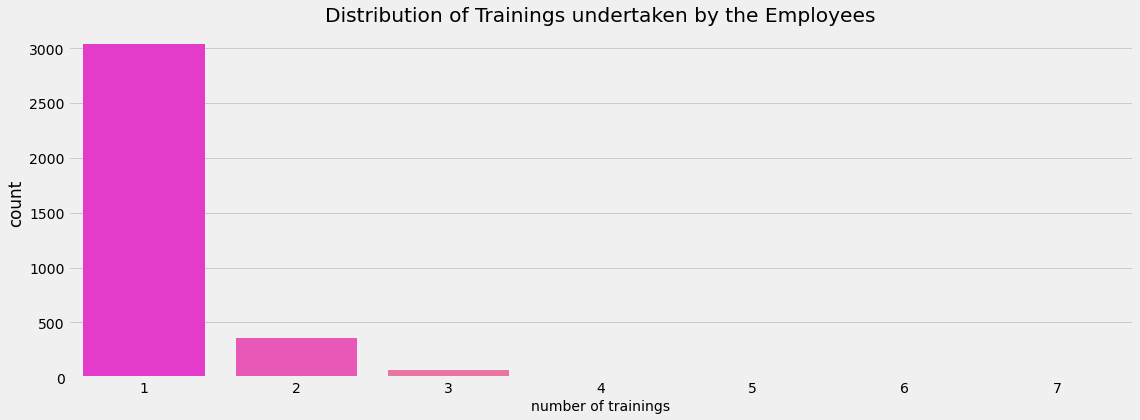

In [20]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (17, 6)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel('number of trainings', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

From the above Countplot, where we are checking the distribution of trainings undertaken by the Employee, It is clearly visible that 80 % of the employees have taken the training only once, and there are negligible no. of employees who took trainings more than thrice.

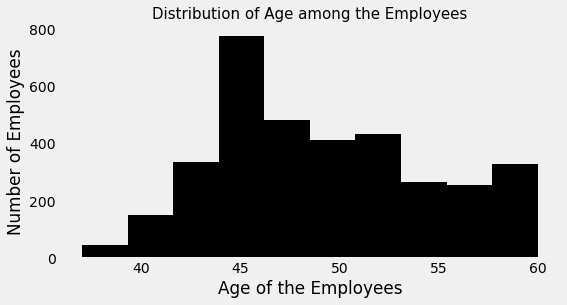

In [21]:
# lets check the Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.ylabel('Number of Employees')
plt.grid()
plt.show()

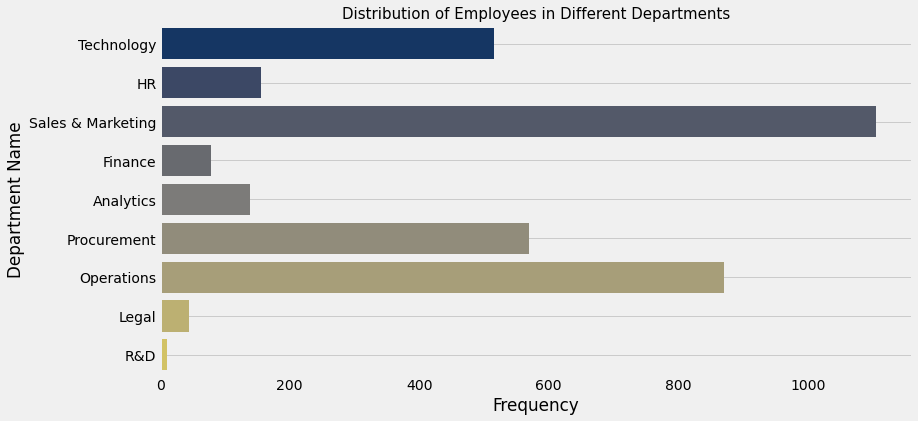

In [22]:
# lets check the frequencies of different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')  # we kept the orientation as vertical because there are lot of values
plt.xlabel('Frequency')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

we observe that the highest number of employees work in Sales & Marketing department and least number of employees work in R&D department

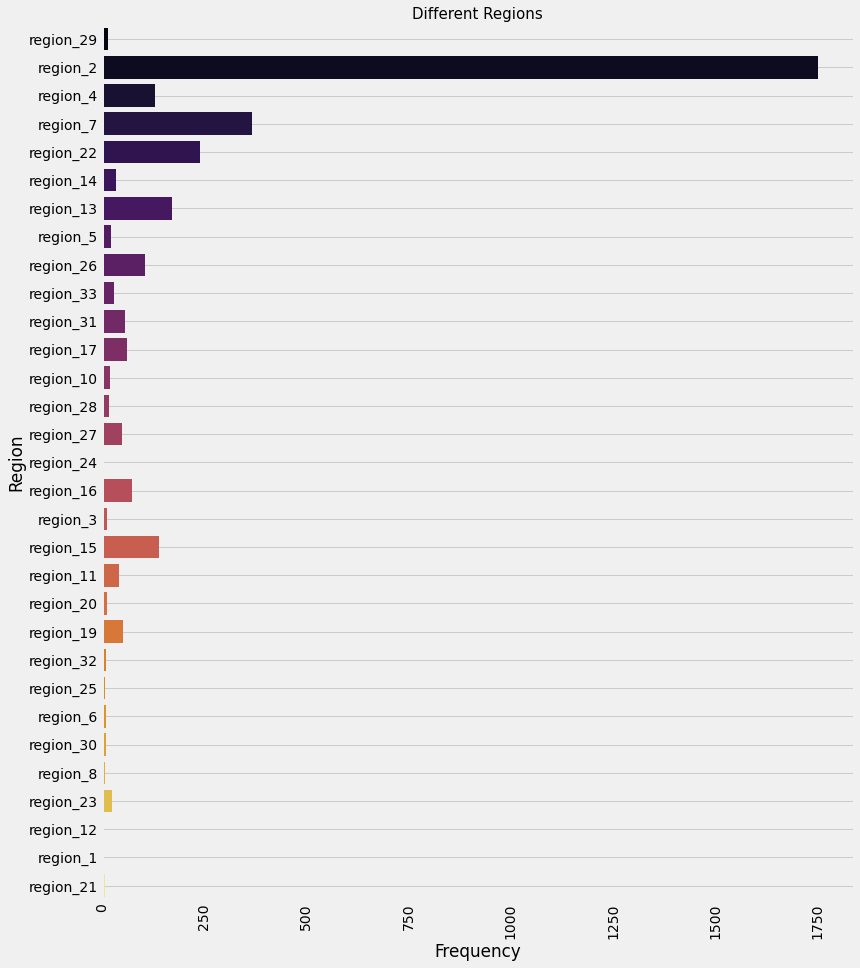

In [23]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('Frequency')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Region 2 and Region 22 have very high number of employees working over there

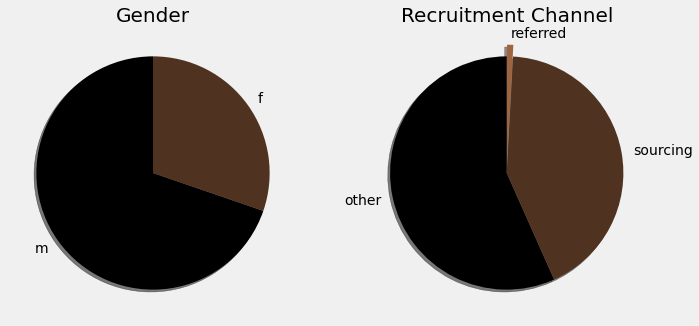

In [25]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Gender of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Recruitment Channel of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

Obviously Females are again in Minority as compared to their Male Counterparts.
and the Recruitment Channel, says that the Referred Employees are very less, i.e., most of the employees are recruited either by sourcing, or some other recruitment agencies, sources etc.


BIVARIATE ANALYSIS

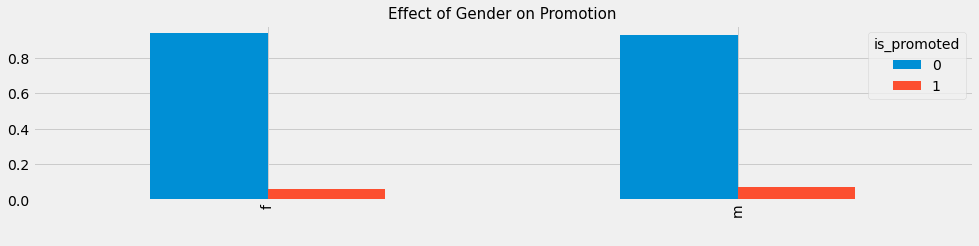

In [25]:
# Lets compare the Gender Gap in the promotion     CATEGORICAL VS CATEGORICAL using crosstab() function

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
#colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

the first bar chart is for females and second bar chart is for males
red means promoted, blue means not promoted
there is no significant difference between males and females when it comes to promotion, both are equally promoted

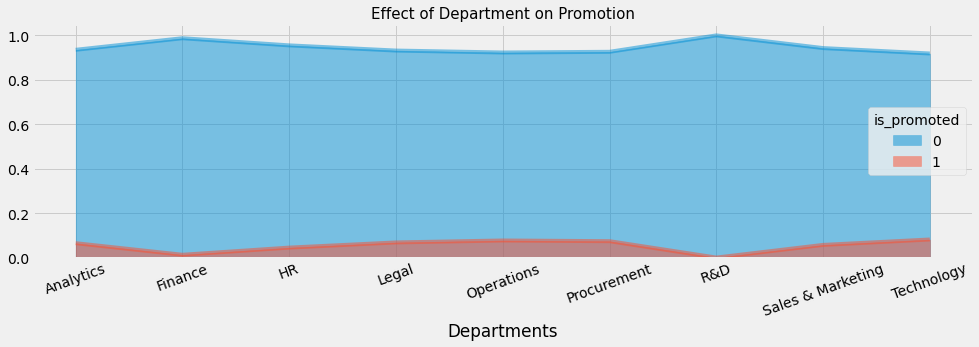

In [26]:
# lets compare the effect of different Departments and Promotion        CATEGORICAL VS CATEGORICAL using crosstab() function

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
#colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel('Departments')
plt.show()

red means promoted
blue means not promoted
we observe that departments like Analytics, R&D, Technology, Operations etc have higher probability of promotion as their curve height is somehow above than others

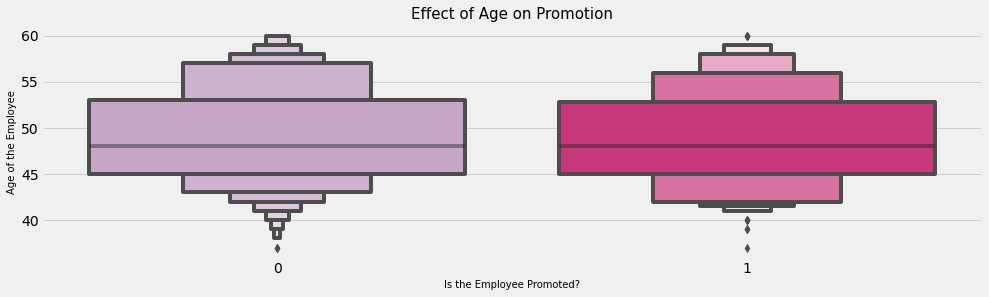

In [27]:
# Effect of Age on the Promotion     CATEGORICAL vs NUMERICAL using boxenplot(extension of boxplot)

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

0 means donot get promoted
1 means get promoted
we observe that most of the employees who get promotion or donot get promotion lie in the age group of 30 to 40 years old

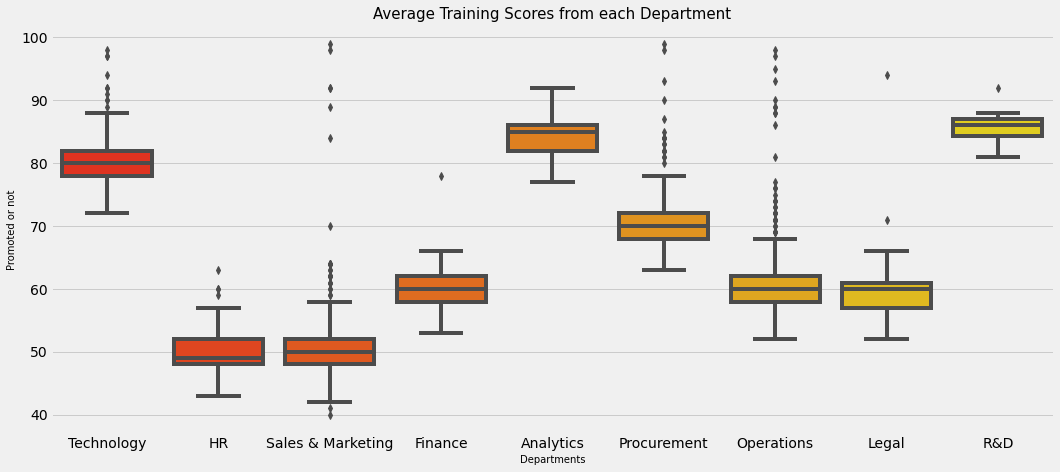

In [28]:
# Department Vs Average Training Score         comapring avg training score from different department
#CATEGORICAL vs NUMERICAL using boxplot

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

MULTIVARIATE ANALYSIS

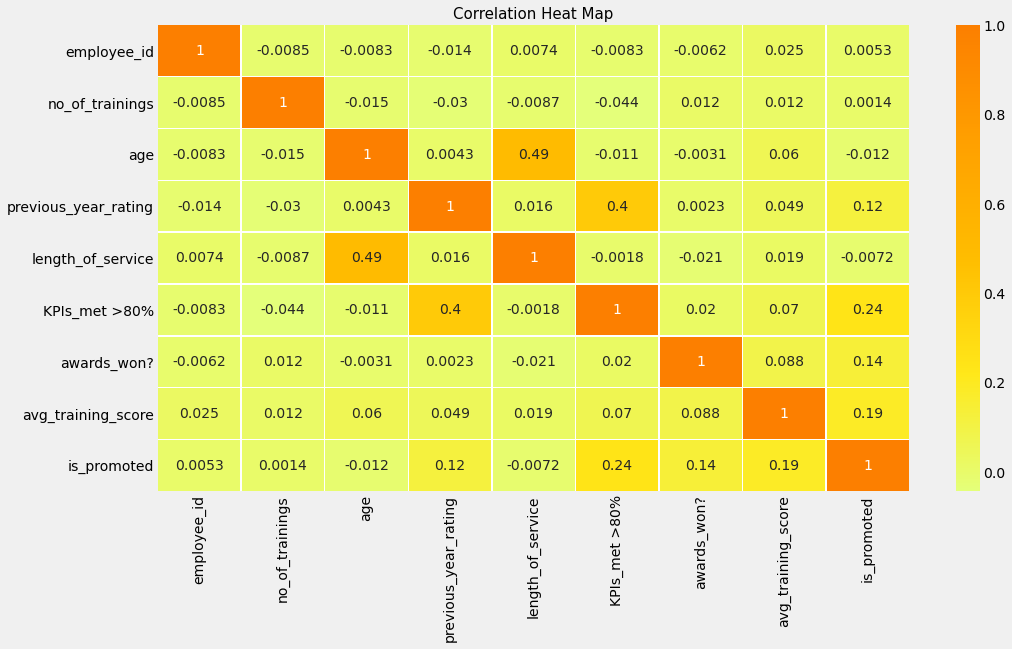

In [29]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

value = 1 means the two columns are hgihly correlated
value = 0 means the two columns are having no relation
value = -1 means the two columns are opposite to each other
here we observe that 'age' and 'length_of_service' have a correlation value of 0.66, which means they are correlated
                     'KPIs_mat > 80%' and 'previous_year_rating' are also correlated to some extent

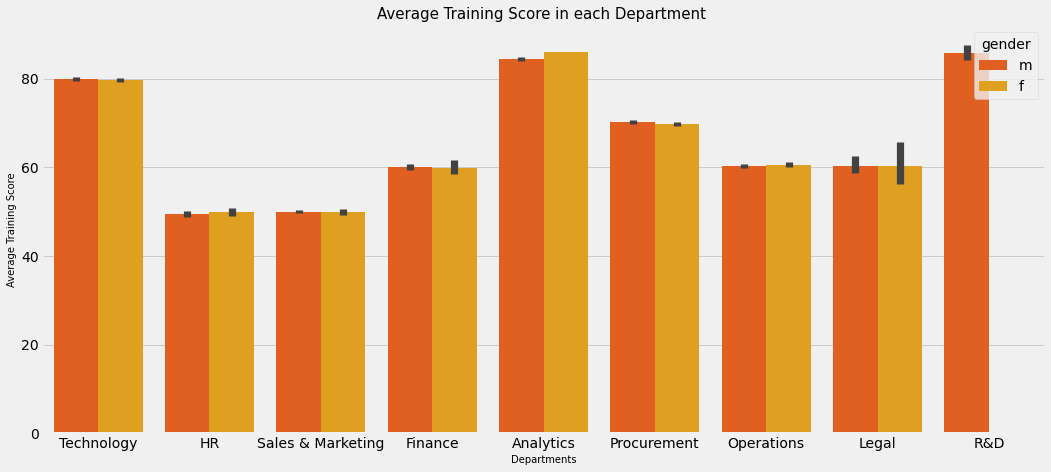

In [30]:
# lets check the relation of Departments and Average Training Score and Gender

plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['avg_training_score'], hue = train['gender'], palette = 'autumn')
plt.title('Average Training Score in each Department ', fontsize = 15)
plt.ylabel('Average Training Score', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

This Graph helped us to understand the average training score of males and females in each of the departments


FEATURE ENGINEERING

In [31]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum which will store the sum of awards won, KPIs met and previous year rating for both test and train dataset
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

# creating a total score column which will store the product of average training score and number of trainings for both test and train dataset
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [32]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
13,38401,Technology,region_29,Master's & above,m,other,2,39,3.0,16,0,0,80,0,3.0,160
42,23560,HR,region_2,Bachelor's,m,sourcing,1,59,4.0,26,1,0,52,0,5.0,52
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1,5.0,47
74,77577,Sales & Marketing,region_7,Bachelor's,m,other,1,50,3.0,14,0,0,52,0,3.0,52
99,51256,Finance,region_2,Master's & above,m,other,1,60,5.0,17,0,0,59,0,5.0,59


In [33]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

In [34]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 60
but, still got promotion.
''' 

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score


we observe that there are two such records. These records are very harmful to our prediction model, so we will remove them.

In [35]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (3489, 13)
After Deletion of the above two rows : (3489, 13)


CATEGORICAL ENCODING

converting categorical columns to numerical type because ML models only works with numerical columns

In [36]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender
13,Technology,Master's & above,m
42,HR,Bachelor's,m
60,Sales & Marketing,Master's & above,m
74,Sales & Marketing,Bachelor's,m
99,Finance,Master's & above,m


In [37]:
# lets check the value counts for the education column
train['education'].value_counts()

Master's & above    1759
Bachelor's          1730
Name: education, dtype: int64

In [38]:
# lets check the value counts for the department column
train['department'].value_counts()

Sales & Marketing    1105
Operations            871
Procurement           569
Technology            516
HR                    156
Analytics             139
Finance                79
Legal                  44
R&D                    10
Name: department, dtype: int64

In [39]:
# lets check the value counts for the gender column
train['gender'].value_counts()

m    2433
f    1056
Name: gender, dtype: int64

In [40]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [41]:
# lets check the data after encoding
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
13,8,3,1,2,39,3.0,16,0,0,80,0,3.0,160
42,2,2,1,1,59,4.0,26,1,0,52,0,5.0,52
60,7,3,1,1,50,4.0,17,1,0,47,1,5.0,47


DATA PROCESSING
1. Splitting the Data
2. Resampling
3. Validation Set Splitting

SPLITTING THE DATA

In [42]:
# lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (3489, 12)
Shape of the y : (3489,)
Shape of the x Test : (23490, 12)


RESAMPLING

In [43]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(6510, 12)
(6510,)


In [44]:
# lets also check the value counts of our target variable

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    3255
1     234
Name: is_promoted, dtype: int64
After Resampling :
0    3255
1    3255
Name: 0, dtype: int64


0 means NOT PROMOTED
1 means PROMOTED
we observe that our is_promoted column is balanced ie equal numbers of 0s and 1s are obtained after resampling

In [45]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (5208, 12)
Shape of the y Train : (5208, 1)
Shape of the x Valid : (1302, 12)
Shape of the y Valid : (1302, 1)
Shape of the x Test : (23490, 12)


FEATURE SCALING

Feature Scaling is a method used to normalize the range of independent variables or features of data.

In [46]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

PREDICTIVE MODELLING

Predictive Modelling uses statistics to predict our model
We will use Decision Tree to predict our model

In [47]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)       #fitting or training our models

y_pred = model.predict(x_valid)

PERFORMANCE ANALYSIS

Training Accuracy : 0.9994239631336406
Testing Accuracy : 0.9585253456221198


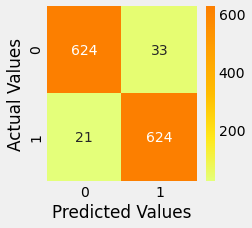

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

we observe that the accuracy of both testing and training datasets are excellent, so our model will perform well
and in the confusion matrix, out of 657 (623 + 34) unpromoted employees it predicted 623 correctly and rest of them incorrectly
                             out of 645 (26 + 619) promoted employees it predicted 619 correctly and rest of them incorrectly

In [49]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       657
           1       0.95      0.97      0.96       645

    accuracy                           0.96      1302
   macro avg       0.96      0.96      0.96      1302
weighted avg       0.96      0.96      0.96      1302



0 means Not Promoted ie 'is_promoted' column has 'No' value
1 means Promoted ie 'is_promoted' column has 'Yes' value

Recall = out of all positive classes, how much we predicted correctly. It should be as high as possible.

Precision = out of all the positive classes we have predicted correctly, how many are actually positive.

F1-Score = It is difficult to compare 2 models with low precision and high recall or vice-versa. So to make them comparable, we            use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of                  Arithmetic Mean by punishing the extreme values more.

we observe that the precision and recall have very good score and accuracy is also very good

We have built a good predictive model!!

REAL TIME PREDICTION

First, we we will check the descriptive summary of the data again, so that we can analyze the columns and values which we can provide to the Model as Input and expect the Model to return Output whether the Employee should get a promotion or not.

Then we will define the value for which we want the predction, and then finally we will predict the values.

In [50]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.00000,3489.000000
mean,5.381198,2.504156,0.697334,1.168243,49.145027,3.302379,17.629120,0.241903,0.008598,62.071081,0.067068,3.55288,72.591574
std,2.125439,0.500054,0.459478,0.506902,5.423166,1.230116,3.712584,0.428297,0.092342,12.285130,0.250175,1.45818,35.119410
min,0.000000,2.000000,0.000000,1.000000,37.000000,1.000000,14.000000,0.000000,0.000000,40.000000,0.000000,1.00000,40.000000
25%,4.000000,2.000000,0.000000,1.000000,45.000000,3.000000,15.000000,0.000000,0.000000,51.000000,0.000000,3.00000,52.000000
50%,5.000000,3.000000,1.000000,1.000000,48.000000,3.000000,17.000000,0.000000,0.000000,60.000000,0.000000,3.00000,62.000000
75%,7.000000,3.000000,1.000000,1.000000,53.000000,4.000000,19.000000,0.000000,0.000000,71.000000,0.000000,5.00000,79.000000
max,8.000000,3.000000,1.000000,7.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.00000,469.000000


# lets perform some Real time predictions on top of the Model that we just created using Decision Tree Classifier

# lets check the parameters we have in our Model

department -> The values are from 0 to 8, (Department does not matter a lot for promotion)

education -> The values are from 0 to 3 where Masters-> 3, Btech -> 2, and secondary ed -> 1

gender -> the values are 0 for female, and 1 for male

no_of_trainings -> the values are from 0 to 5

age -> the values are from 20 to 60

previou_year_rating -> The values are from 1 to 5

length_of service -> The values are from 1 to 37

KPIs_met >80% -> 0 for Not Met and 1 for Met

awards_won> -> 0-no, and 1-yes

avg_training_score -> ranges from 40 to 99

sum_metric -> ranges from 1 to 7

total_score -> 40 to 710


In [51]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
13,8,3,1,2,39,3.0,16,0,0,80,0,3.0,160
42,2,2,1,1,59,4.0,26,1,0,52,0,5.0,52
60,7,3,1,1,50,4.0,17,1,0,47,1,5.0,47
74,7,2,1,1,50,3.0,14,0,0,52,0,3.0,52
99,1,3,1,1,60,5.0,17,0,0,59,0,5.0,59


from looking at the above dataset we can use the values to predict whether an employee will be promoted or not.
Let's do it 

In [52]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(model, step = 1, min_features_to_select = 6, n_jobs = -1)
rfecv.fit(x_train, y_train)
prediction = rfecv.predict(np.array([[2, # department code
                                      3, # number of masters degree
                                      1, # male
                                      1, # 1 training done
                                      30, # 30 years old
                                      5, # previous year rating
                                      10, # length of service
                                      1, # KPIs met >80%, 1 means yes
                                      1, # awards won, 1 means yes
                                      95, # avg training score
                                      7, # sum of metric 
                                      700 # total score
                                     ]]))

print("Whether the Employee should get a Promotion?")
if(prediction):
    print("YES")
else:
    print("NO")
#print(prediction)

Whether the Employee should get a Promotion?
YES


the above prediction is done using only the x_train and y_train sets, so whatever value we give to the array, the prediction will always be YES showing that the model works. 
Now we have to train the model (Decision Tree Classifier) on the entire dataset (x and y sets).
Let's do it

In [53]:
dtc = DecisionTreeClassifier()
dtc.fit(x, y)

DecisionTreeClassifier()

Now our model is trained on the entire datase. Let's go for some prediction.

In [54]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(dtc, step = 1, min_features_to_select = 6, n_jobs = -1)
rfecv.fit(x, y)
prediction = rfecv.predict(np.array([[2, # department code
                                      3, # number of masters degree
                                      1, # male
                                      1, # 1 training done
                                      30, # 30 years old
                                      5, # previous year rating
                                      10, # length of service
                                      1, # KPIs met >80%, 1 means yes
                                      1, # awards won, 1 means yes
                                      95, # avg training score
                                      7, # sum of metric 
                                      700 # total score
                                     ]]))

print("Whether the Employee should get a Promotion?")
if(prediction):
    print("YES")
else:
    print("NO")

Whether the Employee should get a Promotion?
YES


In [55]:
rfecv = RFECV(dtc, step = 1, min_features_to_select = 6, n_jobs = -1)
rfecv.fit(x, y)
prediction = rfecv.predict(np.array([[2, # department code
                                      1, # number of masters degree
                                      1, # male
                                      1, # 1 training done
                                      40, # 30 years old
                                      3, # previous year rating
                                      20, # length of service
                                      0, # KPIs met >80%, 1 means yes
                                      0, # awards won, 1 means yes
                                      40, # avg training score
                                      7, # sum of metric 
                                      280 # total score
                                     ]]))

print("Whether the Employee should get a Promotion?")
if(prediction):
    print("YES")
else:
    print("NO")

Whether the Employee should get a Promotion?
NO


Here we predicted whether an employee belonging to an organization should get a promotion or not, using Logistic Regression and Decision Trees.

We also used Feature Selection, and Hyper Parameter Tuning to Improve the Model.